Operações muito parecidas com as de projeção, seleção, deleção e junção.

Métodos:
- loc - projeta as colunas do DataFrame pelos rótulos.
- iloc - a projeção depende dos indexes numéricos das linhas e colunas de um DataFrame.
- query -  Intuitivo. Valor ou dimensão tem de ser declarado com o acento crase (`) ).
- Concat: realiza a junção entre as séries pelos seus indexes.
- Merge: declara-se as chaves estrangeiras que serão a base da junção e declara-se os sufixos em caso de repetição de nome de coluna.
- Join: O join é feito a partir de um dos DataFrames, assim como o merge, mas ele depende do index, e a junção é feita no index padrão.

In [2]:
import pandas as pd

### Criando dois DataFrames de exemplo

In [3]:
data1 = {
    "Nome": ["Vanessa", "Raphael", "Vinicius", "Ana"],
    "Idade": [37, 39, 47, 28],
    "Cidade": ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "Salvador"],
}
df1 = pd.DataFrame(data1)

data2 = {
    "Nome": ["Vanessa", "Raphael", "Vinicius", "Ana"],
    "Salário": [5000, 8000, 4500, 5500],
}
df2 = pd.DataFrame(data2)

### Projeção usando loc: selecionando colunas pelo rótulo

In [4]:
projeção_loc = df1.loc[:, ["Nome", "Idade"]]
print("Projeção usando loc:")
print(projeção_loc)

Projeção usando loc:
       Nome  Idade
0   Vanessa     37
1   Raphael     39
2  Vinicius     47
3       Ana     28


### Projeção usando iloc: selecionando colunas pelos índices numéricos

In [5]:
projeção_iloc = df1.iloc[:, [0, 1]]
print("\nProjeção usando iloc:")
print(projeção_iloc)


Projeção usando iloc:
       Nome  Idade
0   Vanessa     37
1   Raphael     39
2  Vinicius     47
3       Ana     28


### Seleção usando query: selecionando registros onde a idade é maior que 30

In [6]:
seleção_query = df1.query("Idade > 30")
print("\nSeleção usando query:")
print(seleção_query)


Seleção usando query:
       Nome  Idade          Cidade
0   Vanessa     37       São Paulo
1   Raphael     39  Rio de Janeiro
2  Vinicius     47  Belo Horizonte


### Junção usando merge: juntando os DataFrames pela coluna 'Nome'

In [7]:
junção_merge = pd.merge(df1, df2, on="Nome", how="inner")
print("\nJunção usando merge:")
print(junção_merge)


Junção usando merge:
       Nome  Idade          Cidade  Salário
0   Vanessa     37       São Paulo     5000
1   Raphael     39  Rio de Janeiro     8000
2  Vinicius     47  Belo Horizonte     4500
3       Ana     28        Salvador     5500



### Concatenando os DataFrames por índices

In [8]:

concatenado = pd.concat([df1, df2], axis=1)
print("Concatenação:")
print(concatenado)

Concatenação:
       Nome  Idade          Cidade      Nome  Salário
0   Vanessa     37       São Paulo   Vanessa     5000
1   Raphael     39  Rio de Janeiro   Raphael     8000
2  Vinicius     47  Belo Horizonte  Vinicius     4500
3       Ana     28        Salvador       Ana     5500


### Merge usando a chave 'Nome' como base e sufixos '_df1' e '_df2' em caso de repetição de nome de coluna

In [9]:

merge = pd.merge(df1, df2, on="Nome", suffixes=("_df1", "_df2"), how="inner")
print("\nMerge:")
print(merge)


Merge:
       Nome  Idade          Cidade  Salário
0   Vanessa     37       São Paulo     5000
1   Raphael     39  Rio de Janeiro     8000
2  Vinicius     47  Belo Horizonte     4500
3       Ana     28        Salvador     5500


### Join usando os índices como base

In [10]:

df1.set_index("Nome", inplace=True)
df2.set_index("Nome", inplace=True)
juncao_join = df1.join(df2, lsuffix="_df1", rsuffix="_df2")
print("\nJoin:")
print(juncao_join)


Join:
          Idade          Cidade  Salário
Nome                                    
Vanessa      37       São Paulo     5000
Raphael      39  Rio de Janeiro     8000
Vinicius     47  Belo Horizonte     4500
Ana          28        Salvador     5500


### Visualização simples: Histograma da idade

Text(0.5, 1.0, 'Histograma da Idade')

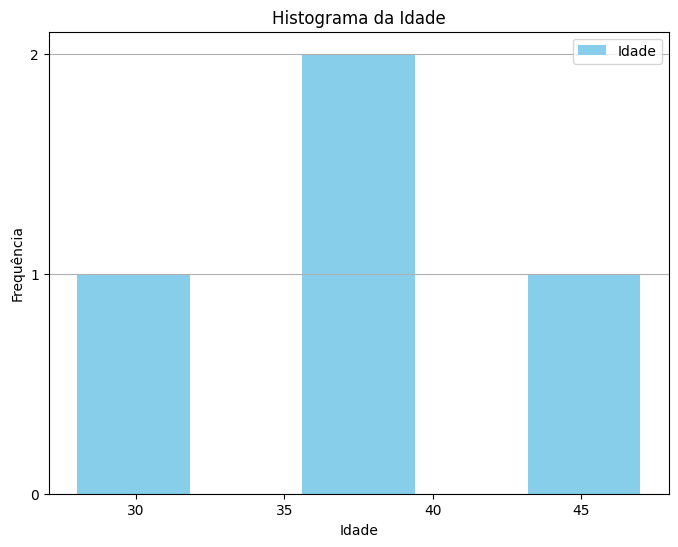

In [14]:
histograma_idade = df1["Idade"].plot(
    kind="hist", bins=5, color="skyblue", figsize=(8, 6), title="Histograma da Idade"
)
histograma_idade.set_xlabel("Idade")
histograma_idade.set_ylabel("Frequência")
histograma_idade.set_xticks(range(30, 50, 5))  # Ajustando os ticks do eixo x
histograma_idade.set_yticks(range(0, 3))  # Ajustando os ticks do eixo y
histograma_idade.grid(axis="y")  # Adicionando linhas de grade no eixo y
histograma_idade.legend(["Idade"])  # Adicionando legenda
histograma_idade.set_title("Histograma da Idade")  # Adicionando título

### Visualização simples: Gráfico de barras do salário por nome

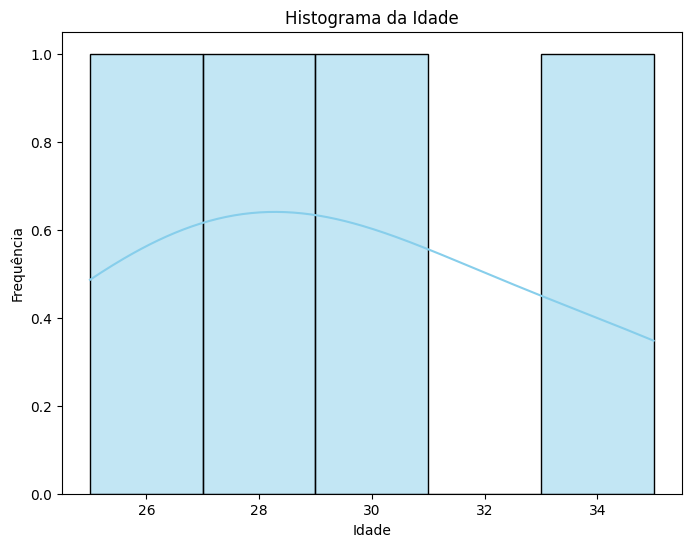

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10232\3310468810.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Nome", y="Salário", data=df2, palette="muted")


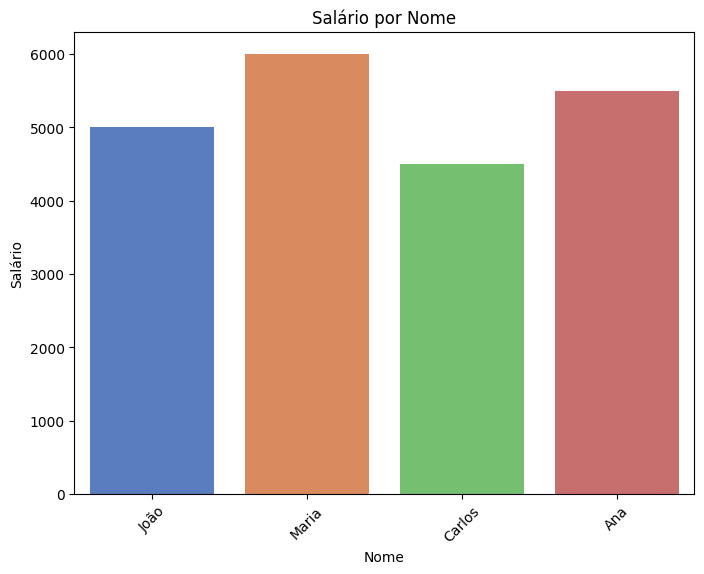

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando dois DataFrames de exemplo
data1 = {
    "Nome": ["João", "Maria", "Pedro", "Ana"],
    "Idade": [25, 30, 35, 28],
    "Cidade": ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "Salvador"],
}
df1 = pd.DataFrame(data1)

data2 = {
    "Nome": ["João", "Maria", "Carlos", "Ana"],
    "Salário": [5000, 6000, 4500, 5500],
}
df2 = pd.DataFrame(data2)

# Visualização simples: Histograma da idade
plt.figure(figsize=(8, 6))
sns.histplot(df1["Idade"], bins=5, kde=True, color="skyblue")
plt.title("Histograma da Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# Visualização simples: Gráfico de barras do salário por nome
plt.figure(figsize=(8, 6))
sns.barplot(x="Nome", y="Salário", data=df2, palette="muted")
plt.title("Salário por Nome")
plt.xlabel("Nome")
plt.ylabel("Salário")
plt.xticks(rotation=45)
plt.show()